# Read the CSV files

## Housing Price Data

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
pd.set_option('display.max_rows', None)


In [2]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)

FileNotFoundError: [Errno 2] File Ames_HousePrice.csv does not exist: 'Ames_HousePrice.csv'

## Exploring the Count of Missing Values in Each Column

In [3]:
column_with_nan = housing.columns[housing.isnull().any()]
for column in column_with_nan:
    print(column, housing[column].isnull().sum())

NameError: name 'housing' is not defined

In [180]:
## Thanks Jack for this i appreciate you

## LotFrontage -- replace with mean of the column 
housing['LotFrontage'].fillna(value = housing['LotFrontage'].mean(), inplace = True)

## Replace Nulls where NA just means that the house does not have the feature 

## Basement metrics
housing['BsmtQual'].fillna(value = 'No_Basement', inplace=True)
housing['BsmtCond'].fillna(value = 'No_Basement', inplace=True)
housing['BsmtExposure'].fillna(value = 'No_Basement', inplace=True)
housing['BsmtFinType1'].fillna(value = 'No_Basement', inplace=True)
housing['BsmtFinType2'].fillna(value = 'No_Basement', inplace=True)

## Garage Type 
housing['GarageType'].fillna(value = 'No_Garage', inplace=True)
housing['GarageYrBlt'].fillna(value = 'No_Garage', inplace=True)
housing['GarageFinish'].fillna(value = 'No_Garage', inplace=True)
housing['GarageQual'].fillna(value = 'No_Garage', inplace=True)
housing['GarageCond'].fillna(value = 'No_Garage', inplace=True)

## Replace other nulls where null just means the feature is not there 
housing['FireplaceQu'].fillna(value = 'No_Fireplace', inplace=True)
housing['PoolQC'].fillna(value = 'No_Pool', inplace=True)
housing['Fence'].fillna(value = 'No_Fence', inplace=True)
housing['MiscFeature'].fillna(value = 'No_Misc', inplace=True)
housing['Alley'].fillna(value = 'No_alley', inplace=True)

##----------------------------------------------------------------##

##Replacing nulls with 0s

housing['BsmtFinSF1'].fillna(value = 0, inplace=True)
housing['BsmtFinSF2'].fillna(value = 0, inplace=True)
housing['BsmtUnfSF'].fillna(value = 0, inplace=True)
housing['MasVnrType'].fillna(value = 0, inplace=True)
housing['TotalBsmtSF'].fillna(value = 0, inplace=True)
housing['MasVnrArea'].fillna(value = 0, inplace=True)
housing['BsmtFullBath'].fillna(value = 0, inplace=True)
housing['BsmtHalfBath'].fillna(value = 0, inplace=True)
housing['GarageCars'].fillna(value = 0, inplace=True)
housing['GarageArea'].fillna(value = 0, inplace=True)


## At this point, only one null value remains in the "Electric Column". We will just remove that one row 
housing.dropna(axis = 0, inplace = True)

## Comparing Price Versus 1st Floor Square Footage

In [76]:
from sklearn.linear_model import LinearRegression
price = housing['SalePrice']
area = housing[['1stFlrSF']]
lm = LinearRegression()
lm.fit(np.log(area), np.log(price))
lm.score(np.log(area), np.log(price))

0.38915650616285624

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


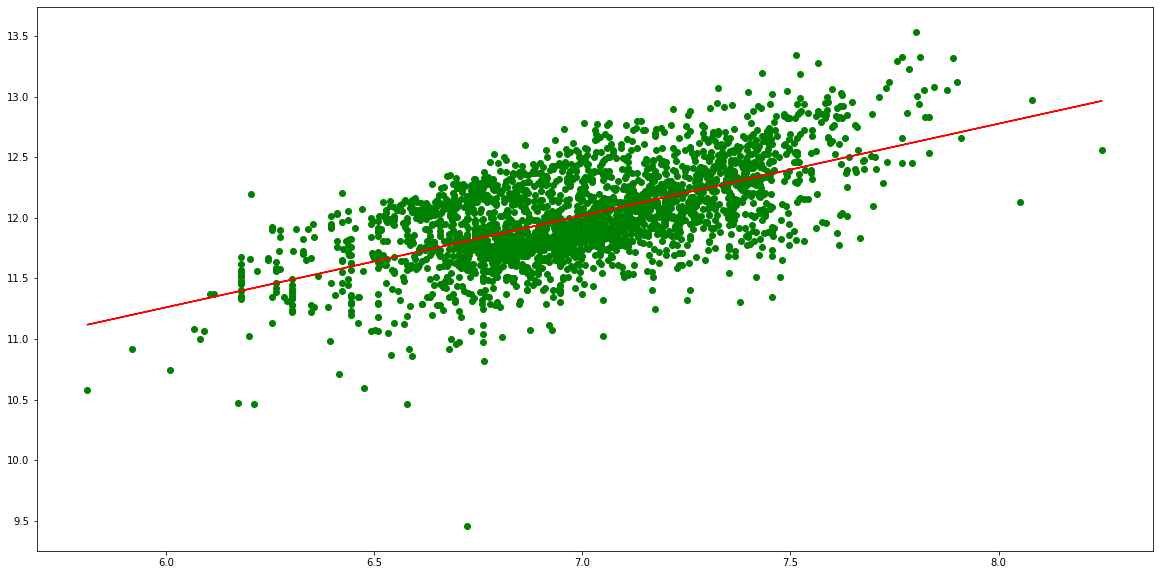

In [84]:
x = np.array(housing['1stFlrSF'])
y = np.array(housing['SalePrice'])
plt.scatter(np.log(x) , np.log(y), color='green')

a = np.log(x).reshape(-1,1)

plt.plot(a, lm.predict(a), c = 'r', lw = 1.5, label='Original Predicted relation')

In [38]:
categorical = ['LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood']
ordinal = ['OverallQual', 'OverallCond', 'KitchenQual', 'FireplaceQu', 'HeatingQC', 'BsmtQual', 'BsmtCond']

## Merging the Addresses onto the Housing dataset

In [181]:
# reading the real estate data
realestate = pd.read_csv('Ames Real Estate Data.csv')
realestate.head()

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3072: DtypeWarning: Columns (36,40,81,87) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,MapRefNo,GeoRefNo,Tier,Range,Prop_Addr,ZngCdPr,ZngCdSc,ZngOLPr,ZngOLSc,ClassPr_S,...,PA-Nmbr,PA-PreD,PA-Strt,PA-StSfx,PA-PostD,PA-UnTyp,PA-UntNo,Date,Source,NmbrBRs
0,520400001,520400001,0,0,4599 GEORGE W CARVER AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4599,NaN,GEORGE W CARVER,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
1,520440010,520440010,0,0,4507 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4507,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
2,520440020,520440020,0,0,4513 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4513,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
3,520445001,520445001,0,0,3449 BARCELOS ST,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,3449,NaN,BARCELOS,ST,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN
4,520445010,520445010,0,0,4506 EVEREST AVE,FS-RL,NaN,NaN,NaN,RESIDENTIAL,...,4506,NaN,EVEREST,AVE,NaN,NaN,NaN,10-Jul-20,Ames City Assessor,NaN


In [182]:
# checking the type of PID and GeoRefNo columns in housing and real estate respectively
print(housing.dtypes['PID'])
print(realestate.dtypes['GeoRefNo'])

int64
int64


In [183]:
# rename housing 'GeoRefNo' column to 'PID' to merge dataframe
realestate.rename(columns = {'GeoRefNo':'PID'}, inplace = True)
realestate.rename(columns = {'Prop_Addr':'Address'}, inplace = True)

In [184]:
realestate.rename(columns = {'Prop_Addr':'Address'}, inplace = True)

In [185]:
realestate = realestate[['Address', 'PID']]
houses = housing[['SalePrice', 'PID']]
merged = houses.merge(realestate, how='inner', on='PID')

In [ ]:
# finding which addresses get repeated
PID = merged['PID']
repeated = merged[PID.isin(PID[PID.duplicated()])].sort_values('PID')
repeated # ran the code block again after removing the duplicates to check that nothing repeated

In [187]:
# removing all the repeated addresses
merged = merged.drop_duplicates(subset = ['PID'])

# checking to see if a repeated address shows up only once
merged.loc[merged['PID'] == 923226300]

merged['Address'] = merged['Address'] + ' Ames Iowa'

## Adding Latitude and Longitude

In [7]:
import geopy
from geopy.geocoders import Nominatim
from geopy.geocoders import GoogleV3
from geopy.extra.rate_limiter import RateLimiter

In [38]:
geolocator = GoogleV3(user_agent = 'housing', api_key = 'yourapikey')

geocode = RateLimiter(geolocator.geocode, min_delay_seconds = 0.05)

# doing a sample case to see that the address formatted in the dataframe 
# would still be valid enough to return correct latitude and longitude coordinates

location = geolocator.geocode('3629 CHILTON AVE Ames Iowa')

print(location.latitude, location.longitude)

41.98649987838884 -93.60213991860324


In [206]:
for i in range(261):
    merged.loc[i*10:(i+1)*10,'Coordinates'] = merged.loc[i*10:(i+1)*10,'Address'].apply(geocode)
    merged.loc[i*10:(i+1)*10,'Lat'] = merged.loc[i*10:(i+1)*10,'Coordinates'].apply(lambda x: x.latitude if x else None)
    merged.loc[i*10:(i+1)*10,'Lon'] = merged.loc[i*10:(i+1)*10,'Coordinates'].apply(lambda x: x.longitude if x else None)
    print(i, end = '\r')

In [ ]:
# merged['Coordinates'] = merged['Address'].apply(geocode)
# merged['Lat'] = merged['Coordinates'].apply(lambda x: x.latitude if x else None)
# merged['Lon'] = merged['Coordinates'].apply(lambda x: x.longitude if x else None)

In [208]:
merged.to_csv('housinglatlong.csv')

## Plotting the houses onto a Map

In [210]:
import json
import geopandas as gpd
from geopandas import GeoDataFrame

In [226]:
df = pd.read_csv('housinglatlong.csv')

print('Latitude max is ' + str(df['Lat'].max()))
print('Latitude min is ' + str(df['Lat'].min()))
print()
print('Longitude max is ' + str(df['Lon'].max()))
print('Longitude min is ' + str(df['Lon'].min()))

Latitude max is 42.0634011
Latitude min is 41.9863214

Longitude max is -93.5794897
Longitude min is -93.693158


In [231]:
df_final = df.drop(['PID', 'Address'], axis=1)


In [295]:
df_final.to_csv('finalhousing.csv')

In [238]:
import os
import conda

conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib

from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

### Using Basemap

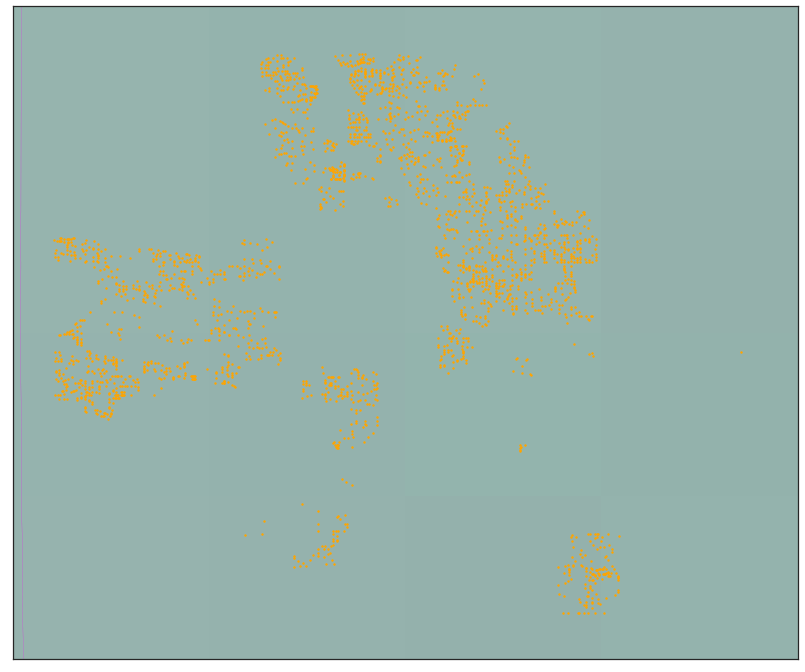

In [314]:
m = Basemap(projection = 'mill',
           llcrnrlat = 41.98,
           urcrnrlat = 42.07,
           llcrnrlon = -93.7,
           urcrnrlon = -93.57,
           resolution = 'h')

fig = plt.figure(figsize=(16, 12))

lat = df['Lat'].values
lon = df['Lon'].values
lons, lats = m(lon, lat)

m.drawcountries(color = 'brown')
m.drawstates(color = 'black') 
m.drawcounties(color = 'magenta')
m.drawrivers(color = 'blue')
m.shadedrelief()

m.scatter(lons, lats, marker = 'o', color = 'orange', s = 2)
plt.show()

### Using GeoPandas 

In [296]:
gdf = gpd.read_file('ames.geojson')

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/fiona/collection.py:208: FeatureWarning:

Empty field name at index 0

/Users/junglim/opt/anaconda3/lib/python3.7/site-packages/geopandas/geodataframe.py:600: UserWarning:

Empty field name at index 0



In [297]:
type(gdf)

geopandas.geodataframe.GeoDataFrame

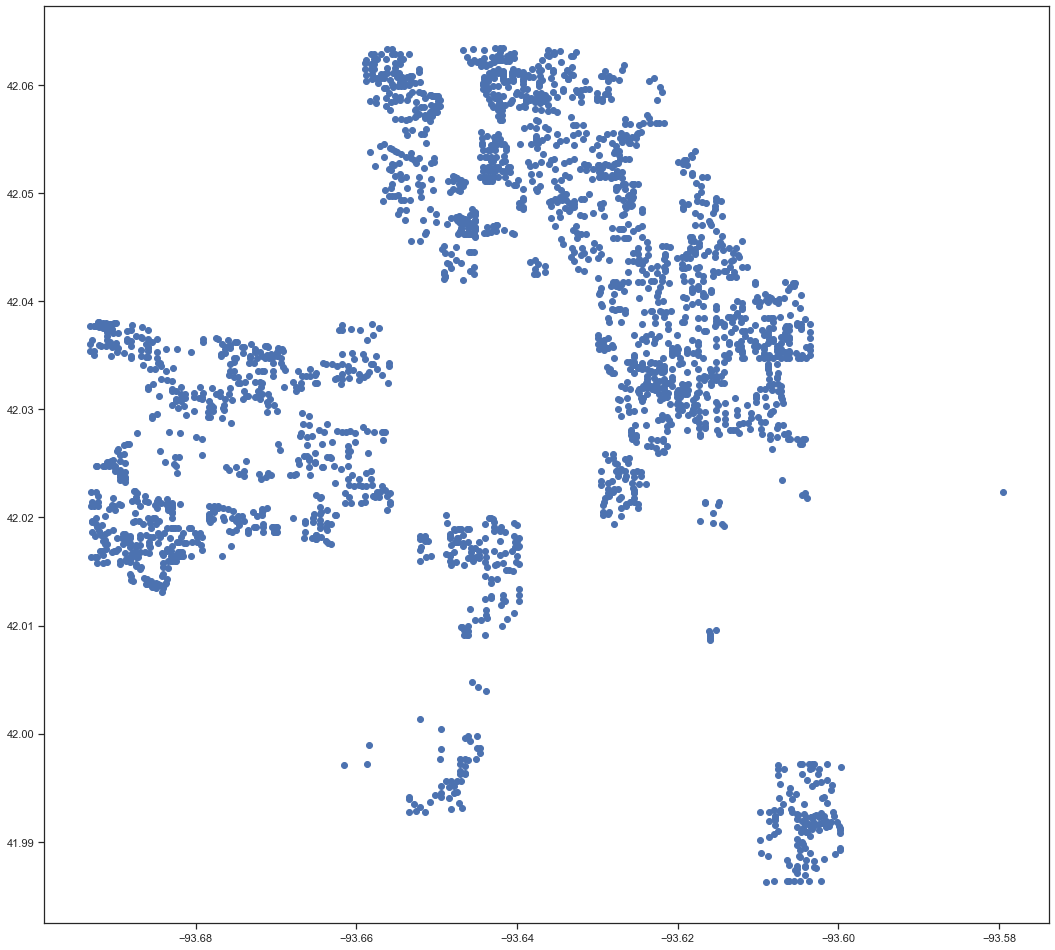

In [313]:
gdf.plot(figsize = (18, 18))


### Using Folium

In [9]:
import pandas as pd
housing = pd.read_csv('finalhousing.csv', index_col = [0])
housing.drop(housing.filter(regex="Unname"),axis=1, inplace=True)
housing.head()

FileNotFoundError: [Errno 2] File finalhousing.csv does not exist: 'finalhousing.csv'

In [10]:
import folium
map = folium.Map(location=[housing.Lat.mean(), housing.Lon.mean()], zoom_start=14, control_scale=True)

housing.apply(lambda row:folium.CircleMarker(location=[row["Lat"], row["Lon"]], 
                                             radius = row["SalePrice"]/110000,
                                             color = False,
                                             fill_color = 'red',
                                             fill = True,
                                             fill_opacity = 0.6).add_to(map),  
                                             axis=1)
    
map

NameError: name 'housing' is not defined